In [9]:
#import the necessary header files 
from keras.models import Sequential
from keras import backend as k
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session
# config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.3
# set_session(tf.Session(config=config))

In [10]:
#create you own keras model
fmodel = Sequential()

In [11]:
#define the basics of image and other properties 
image_width , image_height = 150,150
train_data_dir = '/home/surya/yogesh/data/train'
validate_data_dir = '/home/surya/yogesh/data/validation'
number_train_images = 23000
number_validate_images = 2000
epochs = 50
batchsize = 100

In [12]:
#checking the compatability ... theano or tensorflow from the file ~/keras.json
if k.image_data_format() == 'channels_first':
    input_shape = (3,image_width, image_height)
else:
    input_shape = (image_width,image_height, 3)

In [13]:
#creating my own model with custom layers 
fmodel.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
fmodel.add(Activation('relu'))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

fmodel.add(Conv2D(32,(3,3)))
fmodel.add(Activation('relu'))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

fmodel.add(Conv2D(64,(3,3)))
fmodel.add(Activation('relu'))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

fmodel.add(Conv2D(64,(3,3)))
fmodel.add(Activation('relu'))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

fmodel.add(Conv2D(128,(3,3)))
fmodel.add(Activation('relu'))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

fmodel.add(Flatten())
fmodel.add(Dense(64))
fmodel.add(Activation('relu'))
fmodel.add(Dropout(0.5))
fmodel.add(Dense(1))
fmodel.add(Activation('sigmoid'))
fmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [6]:
#now compile the above model using the statement 
fmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
#we apply the changes to the single train image 
train_single_image = ImageDataGenerator(
                                            rescale=1. /255,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True )

In [31]:
#implement a loop mechanism for all the images in the training directory
trainimage_generator = train_single_image.flow_from_directory(
                                                               train_data_dir,
                                                               target_size = (image_width, image_height),
                                                               batch_size = batchsize,
                                                               class_mode='binary')


OSError: [Errno 2] No such file or directory: '/home/surya/yogesh/data/train'

In [46]:
#we apply the changes to the single validation image
validate_single_image = ImageDataGenerator( rescale = 1. /255)


In [11]:
#implement a loop mechanism for all the images in the validation  directory
validationimage_generator = validate_single_image.flow_from_directory(
                                                               validate_data_dir,
                                                               target_size = (image_width, image_height),
                                                               batch_size = batchsize,
                                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
output = fmodel.fit_generator(
                                 trainimage_generator,
                                 steps_per_epoch=number_train_images // batchsize,
                                 epochs=epochs,
                                 validation_data=validationimage_generator,
                                 validation_steps = number_validate_images // batchsize)

Epoch 1/50
230/230 [==============================] - 96s 419ms/step - loss: 0.6371 - acc: 0.6307 - val_loss: 0.5473 - val_acc: 0.7195
Epoch 2/50
230/230 [==============================] - 96s 416ms/step - loss: 0.5376 - acc: 0.7321 - val_loss: 0.4793 - val_acc: 0.7720
Epoch 3/50
230/230 [==============================] - 96s 418ms/step - loss: 0.4792 - acc: 0.7727 - val_loss: 0.4372 - val_acc: 0.7965
Epoch 4/50
230/230 [==============================] - 96s 419ms/step - loss: 0.4484 - acc: 0.7966 - val_loss: 0.3843 - val_acc: 0.8175
Epoch 5/50
230/230 [==============================] - 96s 416ms/step - loss: 0.4224 - acc: 0.8123 - val_loss: 0.3681 - val_acc: 0.8330
Epoch 6/50
230/230 [==============================] - 96s 416ms/step - loss: 0.4065 - acc: 0.8203 - val_loss: 0.3736 - val_acc: 0.8325
Epoch 7/50
230/230 [==============================] - 96s 418ms/step - loss: 0.3850 - acc: 0.8329 - val_loss: 0.3465 - val_acc: 0.8435
Epoch 8/50
230/230 [==============================] - 9

In [13]:
print(output.history.keys())
import matplotlib.pyplot as  plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


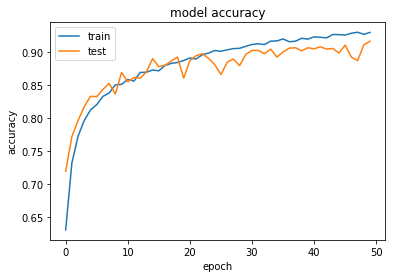

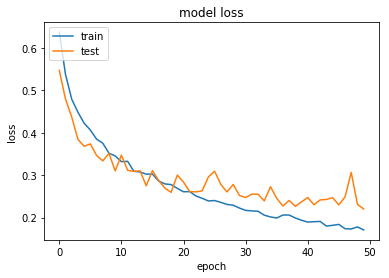

In [14]:
# summarize history for accuracy
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
fmodel.save("50_epoch")

In [9]:
from PIL import Image
from keras.preprocessing.image import *
from keras.preprocessing.image import img_to_array
img = load_img('/home/ram/Downloads/cat.jpg', target_size=(150,150,3))
#res = img.resize((None,150,150))
#dataimg= img_to_array(res)
#dataimg= img_to_array(img)
#print(dataimg.shape)
#hello=fmodel.predict_generator(dataimg, steps=1,verbose=0)
#print(hello)
image = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))


AttributeError: 'Image' object has no attribute 'reshape'

In [8]:
import numpy as np
from PIL import Image
import matplotlib as plt

x_train = Image.open('/home/ram/Downloads/cat.jpg')
x_train = x_train.resize((150,150))
x_train = np.array(x_train)
x_train = x_train.reshape((150,150,3))
print(x_train)

hello=fmodel.predict(x_train)

[[[194 207 223]
  [194 207 223]
  [194 207 223]
  ...
  [193 207 220]
  [183 199 214]
  [159 181 204]]

 [[195 208 224]
  [194 207 223]
  [194 207 223]
  ...
  [191 205 218]
  [181 197 213]
  [157 179 203]]

 [[196 210 223]
  [195 209 222]
  [194 208 221]
  ...
  [190 203 219]
  [179 196 212]
  [155 179 203]]

 ...

 [[231 234 239]
  [234 237 242]
  [236 239 244]
  ...
  [209 213 225]
  [209 213 225]
  [205 209 220]]

 [[235 238 243]
  [238 241 246]
  [240 243 248]
  ...
  [210 214 226]
  [213 217 228]
  [216 220 231]]

 [[238 241 246]
  [241 244 249]
  [243 246 251]
  ...
  [209 213 224]
  [215 219 230]
  [227 231 240]]]


ValueError: Error when checking : expected conv2d_1_input to have 4 dimensions, but got array with shape (150, 150, 3)